In [1]:
#importing library
import matplotlib.pyplot as plt
import numpy as np

# Gini Impurity

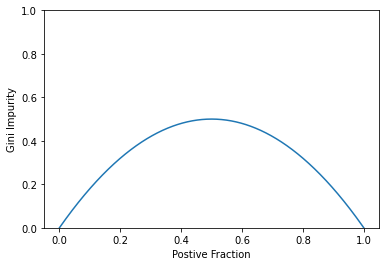

In [41]:
pos_fraction = np.linspace(0.00,1.00,1000)
gini = 1 - pos_fraction**2 - (1-pos_fraction)**2
plt.plot(pos_fraction,gini)
plt.ylim(0,1)
plt.xlabel('Postive Fraction')
plt.ylabel('Gini Impurity')
plt.show()

In [35]:
def gini_impurity(labels):
    #when the set is empty,it is also pure 
    if not labels:
        return 0;
    counts = np.unique(labels,return_counts=True)[1]
#     print(counts)
    fractions = counts/float(len(labels))
    return 1 - np.sum(fractions**2)

In [37]:
print('{0:.4f}'.format(gini_impurity([1,1,0,1,0])))

0.4800


In [36]:
print('{0:.4f}'.format(gini_impurity([1,1,0,1,0,0])))

0.5000


# Entropy

We can visualize how entropy changes under different values of a positive class's fraction in binary cases via the following code:

<ipython-input-42-71ad8eda2227>:2: RuntimeWarning: divide by zero encountered in log2
  ent = - (pos_fraction * np.log2(pos_fraction)+(1-pos_fraction)*np.log2(1-pos_fraction))
<ipython-input-42-71ad8eda2227>:2: RuntimeWarning: invalid value encountered in multiply
  ent = - (pos_fraction * np.log2(pos_fraction)+(1-pos_fraction)*np.log2(1-pos_fraction))


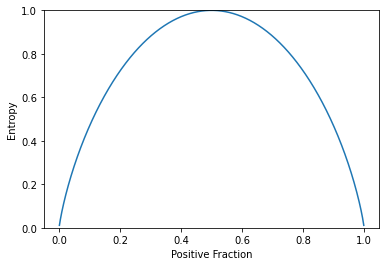

In [42]:
pos_fraction = np.linspace(0.00,1.00,1000)
ent = - (pos_fraction * np.log2(pos_fraction)+(1-pos_fraction)*np.log2(1-pos_fraction))
plt.plot(pos_fraction,ent)
plt.ylim(0,1)
plt.xlabel('Positive Fraction')
plt.ylabel('Entropy')
plt.show()

In [61]:
def entropy(lebels):
    if not lebels:
        return 0;
    counts = np.unique(lebels,return_counts=True)[1]
    fractions = counts/float(len(lebels))
    return -np.sum(fractions*np.log2(fractions))

In [62]:
print('{0:.4f}'.format(entropy([1,1,1,1,1])))

-0.0000


In [63]:
criterion_function = {'gini':gini_impurity,'entropy':entropy}

In [75]:
def weighted_impurity(groups,criterion='gini'):
    """Calculate weighted impurity of children after a split
    Args:
    groups(list of children,and a cild consists a list of class labels)
    criterion(metrtc to measure the quality of a split,'gini' for Gini impurityor 'entropy' for Infromation Gain )
    """
    total = sum(len(group) for group in groups)
    weightedSum = 0.00
    for group in groups:
        weightedSum+=len(group)/float(total) * criterion_function[criterion](group)
        
    return weightedSum

In [76]:
children_1 = [[1,0,1],[0,1]]
children_2 = [[1,1],[0,0,1]]

In [77]:
print('{0:.4f}'.format(weighted_impurity(children_1,'entropy')))

0.9510
